In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
mnist= tf.keras.datasets.mnist

In [ ]:
(train_data,train_label),(test_data,test_label)=mnist.load_data()

In [ ]:
import matplotlib.pyplot as plt

The image is = 5


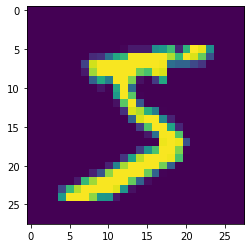

In [ ]:
plt.imshow(train_data[0])
print("The image is =",train_label[0])

In [ ]:
train_data.shape

(60000, 28, 28)

In [ ]:
import numpy as np

In [ ]:
train_data=np.expand_dims(train_data,axis=-1)

In [ ]:
train_data.shape

(60000, 28, 28, 1)

In [ ]:
train_data[3].shape

(28, 28, 1)

In [ ]:
train_label = keras.utils.to_categorical(train_label, 10)
test_label = keras.utils.to_categorical(test_label, 10)

In [ ]:
from tensorflow.keras import models,layers

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=(28,28,1),padding='same'))
model.add(layers.MaxPool2D(padding='valid'))
model.add(layers.Conv2D(filters=64,kernel_size=3,activation='relu',padding='same'))
model.add(layers.MaxPool2D(padding='valid'))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10,activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
historry=model.fit(x=train_data,y=train_label,batch_size=25,epochs=2,verbose=2,validation_split=0.33)

Epoch 1/2
1608/1608 - 9s - loss: 0.0586 - accuracy: 0.9871 - val_loss: 0.0641 - val_accuracy: 0.9882 - 9s/epoch - 5ms/step
Epoch 2/2
1608/1608 - 8s - loss: 0.0554 - accuracy: 0.9874 - val_loss: 0.0565 - val_accuracy: 0.9910 - 8s/epoch - 5ms/step


In [ ]:
from keras.models import save_model
model.save('my_model.h5')

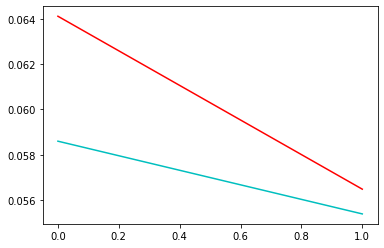

In [ ]:
plt.figure()
plt.plot(historry.history['val_loss'],c='r')
plt.plot(historry.history['loss'],c='c')
plt.show()

In [ ]:
test_loss,test_acc=model.evaluate(x=test_data,y=test_label)
print("Test Accuracy %.2f"%test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0535 - accuracy: 0.9906
Test Accuracy 0.99
